# Solving the Traveling Salesman  Problem using Local Search

Points: 10

## The Traveling Salesman Problem

__Goal:__ Find the shortest tour visiting each of $n$ cities once. Given are pairwise distances between cities. 

__State space:__ Each state represents a tour. The cities are numbered and a tour can be expressed as vector  with the order in which the cities are visited (a permutation).

__Objective function:__ Minimize the tour length.

The optimization problem is to find the optimal arrangement $a^*$ of $n$ queens on the board:

$$\mathrm{argmin}_\pi [ \mathrm{tourLength}(\pi) ]$$

$$\text{s.t.}\ \pi \ \text{is a valid permutation vector}$$

__Local moves:__ Exchange two cities in the order.

## Helper functions


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random

np.set_printoptions(precision=2)
pd.set_option('precision', 2)


def random_tour(n):
    """Create a random tour"""
    
    tour = list(range(n))
    random.shuffle(tour)
    return(tour)

random_tour(10)

[6, 2, 0, 7, 9, 8, 3, 5, 1, 4]

In [17]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a 
    pairwise Euclidean distance matrix.
    """
    
    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })
    
    dist = squareform(pdist(pos))
    
    return({"pos": pos, "dist": dist})
    
tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
      x     y
0  0.05  0.06
1  0.99  0.77
2  0.93  0.45
3  0.15  0.02
4  0.57  0.79
5  1.00  0.09
6  0.33  0.94
7  0.35  0.96
8  0.42  0.47
9  0.88  0.45
Distance matrix:
      0     1     2     3     4     5     6     7     8     9
0  0.00  1.18  0.97  0.11  0.90  0.95  0.92  0.95  0.56  0.92
1  1.18  0.00  0.33  1.13  0.42  0.68  0.68  0.66  0.64  0.34
2  0.97  0.33  0.00  0.89  0.49  0.36  0.78  0.77  0.51  0.05
3  0.11  1.13  0.89  0.00  0.87  0.85  0.93  0.95  0.52  0.85
4  0.90  0.42  0.49  0.87  0.00  0.81  0.29  0.28  0.35  0.46
5  0.95  0.68  0.36  0.85  0.81  0.00  1.08  1.08  0.69  0.37
6  0.92  0.68  0.78  0.93  0.29  1.08  0.00  0.03  0.48  0.74
7  0.95  0.66  0.77  0.95  0.28  1.08  0.03  0.00  0.49  0.74
8  0.56  0.64  0.51  0.52  0.35  0.69  0.48  0.49  0.00  0.46
9  0.92  0.34  0.05  0.85  0.46  0.37  0.74  0.74  0.46  0.00)


In [18]:
def tour_length(tsp, tour):
    """Caclulate the length of a tour, i.e., the objective function."""
    
    tl = 0
    dist = tsp["dist"]
    
    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]
    
    tl += dist[tour[-1], tour[0]]
    
    return(tl)
        
tour = random_tour(10)
tour_length(tsp, tour)

6.971359567563533

Tour length: 6.97


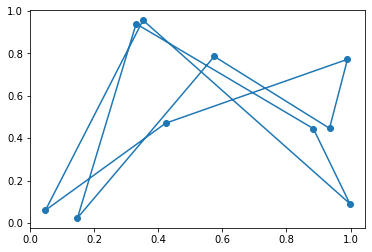

In [19]:
def show_tsp(tsp, tour = None):  
    """display the traveling salesman problem and a tour."""
    
    pos = tsp["pos"]
    
    plt.scatter(pos["x"], pos["y"])
    
    if(tour != None):
        print(f"Tour length: {round(tour_length(tsp, tour), 2)}")
        
        pos_ = pos.reindex(tour)
        pos_ = pos_.append(pos_.head(1))
        plt.plot(pos_["x"], pos_["y"])
    
    plt.show()
    
show_tsp(tsp, tour)

## Use R to find a solution

In [20]:
%load_ext rpy2.ipython

%R if(!"TSP" %in% rownames(installed.packages())) install.packages("TSP", repos="http://cran.us.r-project.org")

d = tsp["dist"]

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
%%R -i d -o tour

library("TSP")

tsp <- TSP(d)
print(tsp)

tour <- solve_TSP(tsp)
print(tour)

object of class ‘TSP’ 
10 cities (distance ‘unknown’) 
object of class ‘TOUR’ 
result of method ‘arbitrary_insertion+two_opt’ for 10 cities
tour length: 3.470495 


Tour length: 3.47


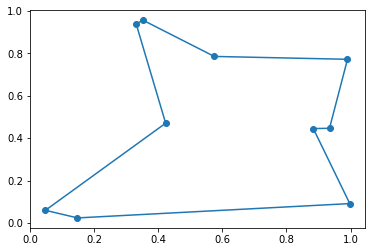

In [22]:
# convert R data back to Python (Python indices start with 0 and we need a Python list)
tour = np.subtract(tour, 1)
tour = tour.tolist()

show_tsp(tsp, tour)

## Steepest-ascend Hill Climbing Search [3 Points]

Calculate the objective function for all local moves (move each queen within its column) and always choose the best among all local moves.

In [23]:
# Code goes here

## Steepest-ascend Hill Climbing Search with Random Restarts [1 Point]

Steepest-ascend with random restarts.

In [24]:
# Code goes here

## Stochastic Hill Climbing [1 Points]

Chooses randomly from among all uphill moves.

In [25]:
# Code goes here

## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state.

In [26]:
# Code goes here

## Simulated Annealing [2 Points]

In [27]:
# Code goes here

## Compare Performance [2 Points]

Use runtime, scalability (number of cities), and best objective function value to compare the algorithms on boards of different sizes.  

For timing you can use the `time` package.

In [28]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.23055076599121094 milliseconds


In [29]:
# Code and results go here

## Bonus: Genetic Algorithm [+1 Point]

In [30]:
# Code goes here